In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets
#!pip install --upgrade openpyxl

**1. Data Preparation**

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Car_price.csv") 
df.head()

Saving Car_price.csv to Car_price.csv


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Data Preparation**

In [ ]:
df.drop(['car_ID', 'CarName'], axis = 1, inplace = True)


In [ ]:
# Finfing missing value
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#choose numerical variable 
numerical_columns = df.select_dtypes(exclude=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
#Function to find outlier in data
def outlier_analyse(dataf):
    iqr_data = []
    l_limit = []
    u_limit = []
    outlier_d = []
    outlier_per = []
    for i in dataf.columns:
        IQR = dataf[str(i)].quantile(0.75) - dataf[str(i)].quantile(0.25)
        iqr_data.append(IQR)
        lower_limit = dataf[str(i)].quantile(0.25) - (1.5 * IQR)
        l_limit.append(lower_limit)
        upper_limit = dataf[str(i)].quantile(0.75) + (1.5 * IQR)
        u_limit.append(upper_limit)
        outlier = ((dataf[str(i)] < lower_limit ) | (dataf[str(i)] > upper_limit)).sum()
        outlier_d.append(outlier)
        outlier_p = round(((outlier*100)/(dataf[str(i)].count())),2)
        outlier_per.append(outlier_p) 

        outlier_data = {'Feature': dataf.columns,'IQR' : iqr_data, 'Lower_Limit' : l_limit,'Upper_Limit': u_limit,
                    'Outlier_Count' : outlier_d, 'Outlier_Percent' : outlier_per}
    outlier_data = pd.DataFrame(outlier_data)
    return(outlier_data)

In [ ]:
num_outliers = outlier_analyse(numerical_columns)
num_outliers

,Feature,IQR,Lower_Limit,Upper_Limit,Outlier_Count,Outlier_Percent
0,symboling,2.00,-3.000,5.000,0,0.00
1,wheelbase,7.90,82.650,114.250,3,1.46
2,carlength,16.80,141.100,208.300,1,0.49
3,carwidth,2.80,59.900,71.100,8,3.90
4,carheight,3.50,46.750,60.750,0,0.00
5,curbweight,790.00,960.000,4120.000,0,0.00
6,enginesize,44.00,31.000,207.000,10,4.88
7,boreratio,0.43,2.505,4.225,0,0.00
8,stroke,0.30,2.660,3.860,20,9.76
9,compressionratio,0.80,7.400,10.600,28,13.66


In [ ]:
# predictor with outlier 
list(num_outliers.Feature)

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
#Install this package if it is error in below code
!pip install feature_engine

     |████████████████████████████████| 205 kB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 43.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables =['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price'                                                                                  
])

In [ ]:
car_price_wins = winsor.fit_transform(df)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

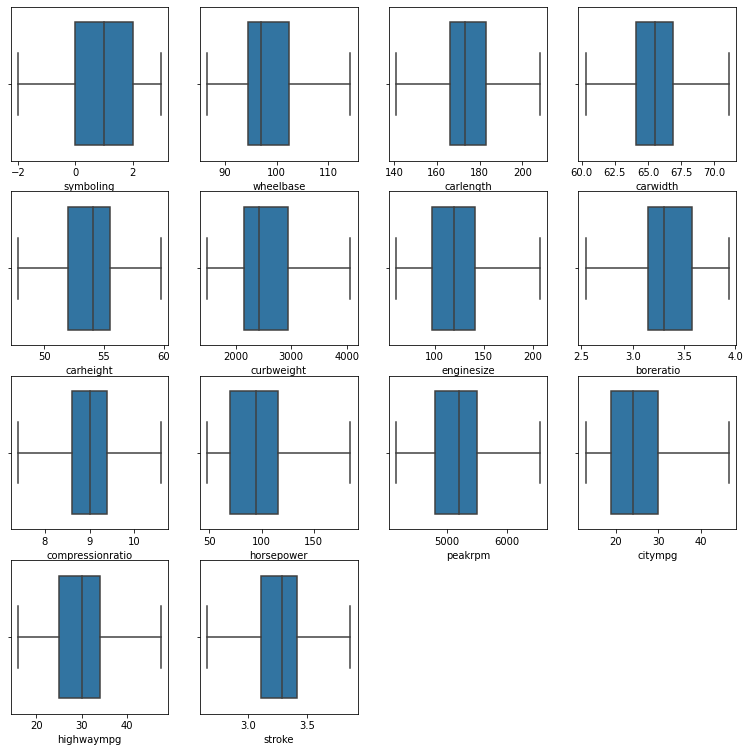

In [ ]:
#Check if still have outlier or not 
plt.figure(figsize=(13, 13))
plt.subplot(4,4,1)
sns.boxplot(car_price_wins['symboling'])
plt.subplot(4,4,2)
sns.boxplot(car_price_wins['wheelbase'])
plt.subplot(4,4,3)
sns.boxplot(car_price_wins['carlength'])
plt.subplot(4,4,4)
sns.boxplot(car_price_wins['carwidth'])
plt.subplot(4,4,5)
sns.boxplot(car_price_wins['carheight'])
plt.subplot(4,4,6)
sns.boxplot(car_price_wins['curbweight'])
plt.subplot(4,4,7)
sns.boxplot(car_price_wins['enginesize'])
plt.subplot(4,4,8)
sns.boxplot(car_price_wins['boreratio'])
plt.subplot(4,4,9)
sns.boxplot(car_price_wins['compressionratio'])
plt.subplot(4,4,10)
sns.boxplot(car_price_wins['horsepower'])
plt.subplot(4,4,11)
sns.boxplot(car_price_wins['peakrpm'])
plt.subplot(4,4,12)
sns.boxplot(car_price_wins['citympg'])
plt.subplot(4,4,13)
sns.boxplot(car_price_wins['highwaympg'])
plt.subplot(4,4,14)
sns.boxplot(car_price_wins['stroke'])
plt.show()

In [ ]:
#Change variable name car_price_wins into df
df=car_price_wins

In [ ]:
df1=df[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','compressionratio','stroke','horsepower','peakrpm','citympg','highwaympg']]


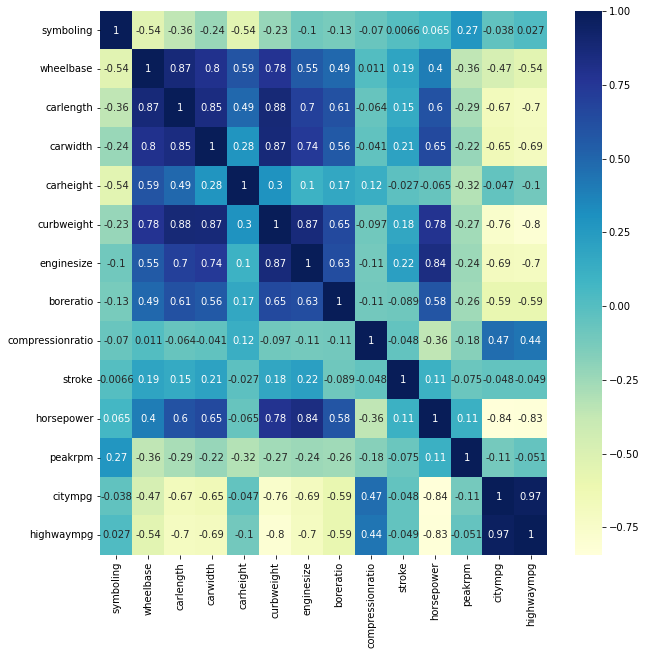

In [ ]:
correlation_matrix = df1.corr()
top_features = correlation_matrix.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_features].corr(),annot=True,cmap="YlGnBu")

from the heatmap above we have the following findings:
variables "wheelbase and carlength" , "curbweight and carlength" , "carwidth and curbweight", "horse power and enginesize", "highwaympg and citympg" exhibit high correlation values.

In [ ]:
#comparing means of variables with higher correlation and dropping the variable which is least important to predict car price. 
#comparing the following set of variables: 'wheelbase and carlength','curbweight and carlength','carwidth and curbweight','enginesize and curbweight',
#'horse power and enginesize','highwaympg and citympg'
df.drop(['carlength','curbweight','carwidth','horsepower','highwaympg'], axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
0,3.0,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,130.0,mpfi,3.47,2.68,9.0,5000.0,21.0,13495.0
1,3.0,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,130.0,mpfi,3.47,2.68,9.0,5000.0,21.0,16500.0
2,1.0,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,six,152.0,mpfi,2.68,3.47,9.0,5000.0,19.0,16500.0
3,2.0,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,four,109.0,mpfi,3.19,3.40,10.0,5500.0,24.0,13950.0
4,2.0,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,five,136.0,mpfi,3.19,3.40,8.0,5500.0,18.0,17450.0


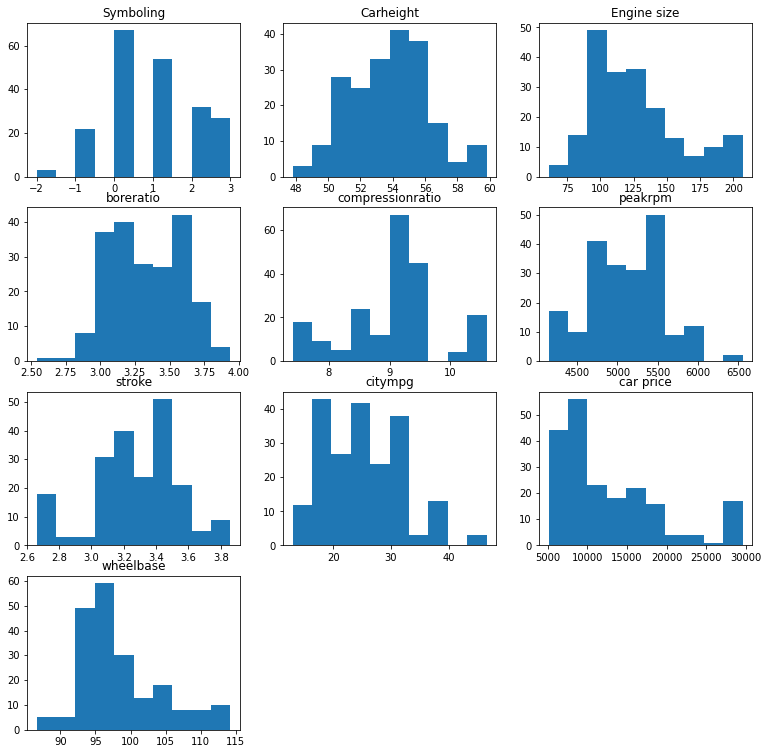

In [ ]:
# Distribution of the predictors
plt.figure(figsize=(13, 13))
a=plt.subplot(4,3,1)
a.hist(df['symboling'],bins=10)
a.set_title('Symboling')
b=plt.subplot(4,3,2)
b.hist(df['carheight'],bins=10)
b.set_title('Carheight')
c=plt.subplot(4,3,3)
c.hist(df['enginesize'],bins=10)
c.set_title('Engine size')
d=plt.subplot(4,3,4)
d.hist(df['boreratio'],bins=10)
d.set_title('boreratio')
e=plt.subplot(4,3,5)
e.hist(df['compressionratio'],bins=10)
e.set_title('compressionratio')
f=plt.subplot(4,3,6)
f.hist(df['peakrpm'],bins=10)
f.set_title('peakrpm')
g=plt.subplot(4,3,7)
g.hist(df['stroke'],bins=10)
g.set_title('stroke')
h=plt.subplot(4,3,8)
h.hist(df['citympg'],bins=10)
h.set_title('citympg')
h=plt.subplot(4,3,9)
h.hist(df['price'],bins=10)
h.set_title('car price')
h=plt.subplot(4,3,10)
h.hist(df['wheelbase'],bins=10)
h.set_title('wheelbase')
plt.show()


In [ ]:
# Checking skewenes for integer columns
int_columns = df.select_dtypes('int').columns.to_list()
float_columns = df.select_dtypes('float').columns.to_list()
int_columns, float_columns
skew_values = df[int_columns].skew()
skew_cols = skew_values.sort_values().to_frame().rename(columns={0:'skew'})

In [ ]:

skew_cols = skew_cols.loc[skew_cols['skew'] > 0.75] # log transform the columns which skewness is over 0.75  
skew_cols

,skew


In [ ]:
# Checking skewenes for float columns
float_skew = df[float_columns].skew()
float_skew.head()
skew_float_cols = float_skew.loc[float_skew > 0.75] # log transform the columns which skewness is over 0.75  
skew_float_cols

wheelbase     0.924916
enginesize    0.908453
price         1.222031
dtype: float64

**2. Data Visualization**

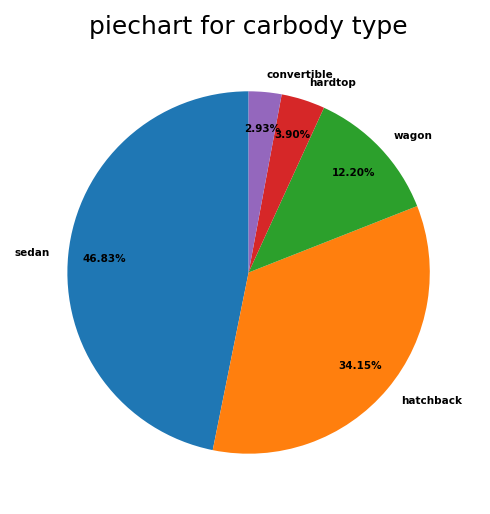

In [ ]:
Oc_count = df['carbody'].value_counts().tolist()
Oc_label = df['carbody'].value_counts().index
plt.figure(figsize = (8,4),dpi = 150)
plt.pie(Oc_count , labels = Oc_label , autopct = '%1.2f%%',textprops={'fontweight':'bold','size' :5},startangle= 90,
       pctdistance = 0.8 , radius = 1)
plt.title('piechart for carbody type')
plt.show()


Text(0, 0.5, 'City Miliage')

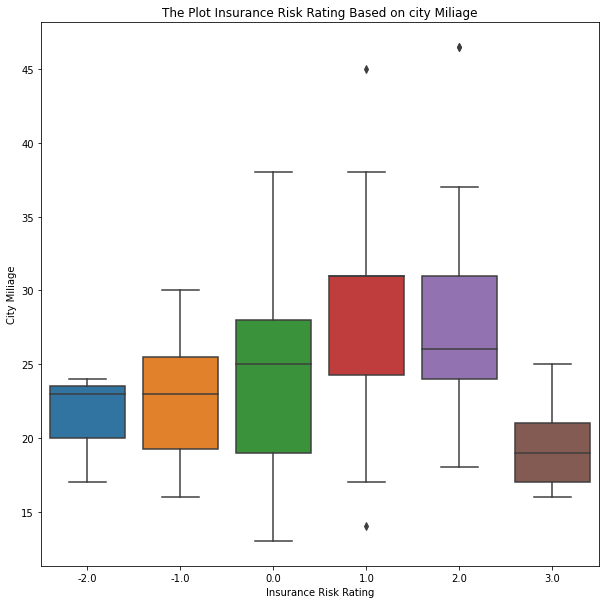

In [ ]:
# Is there any impact of city and city miliage on the insurance risk rating?
plt.figure(figsize=(10, 10))
sns.boxplot(x ='symboling', y ='citympg', data = df)
plt.title('The Plot Insurance Risk Rating Based on city Miliage')
plt.xlabel('Insurance Risk Rating')
plt.ylabel('City Miliage')


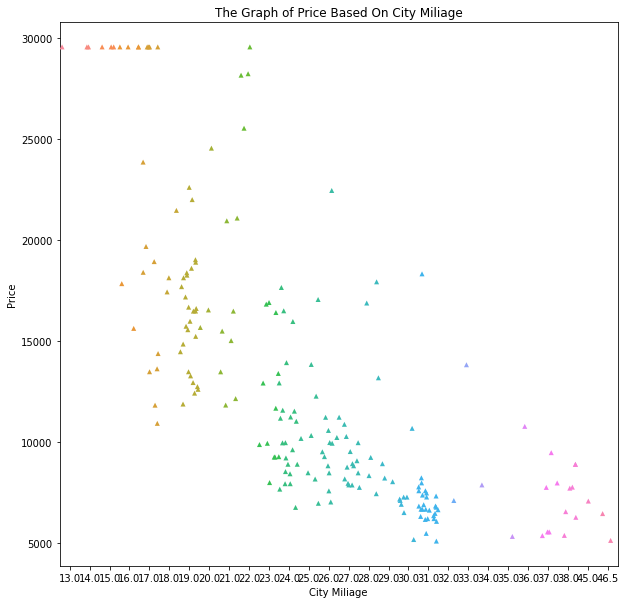

In [ ]:
# Find theimpact of miliage (city and highway miliage) on the price of the car
#Scatter plot for city miliage vs price
plt.figure(figsize=(10, 10))

x2=df['citympg']
y2=df['price']
sns.stripplot(x2, y2, marker ="^",jitter=0.5,edgecolor='none')
plt.title('The Graph of Price Based On City Miliage')
plt.xlabel('City Miliage')
plt.ylabel('Price')
plt.show()


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.710976,5.882586,86.60,94.50,97.00,102.40,114.25
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
enginesize,205.0,124.570732,33.974343,61.00,97.00,120.00,141.00,207.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.261805,0.276855,2.66,3.11,3.29,3.41,3.86
compressionratio,205.0,9.039122,0.793356,7.40,8.60,9.00,9.40,10.60
peakrpm,205.0,5124.634146,475.493024,4150.00,4800.00,5200.00,5500.00,6550.00
citympg,205.0,25.204878,6.491659,13.00,19.00,24.00,30.00,46.50
price,205.0,12831.310571,6716.631714,5118.00,7788.00,10295.00,16503.00,29575.50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


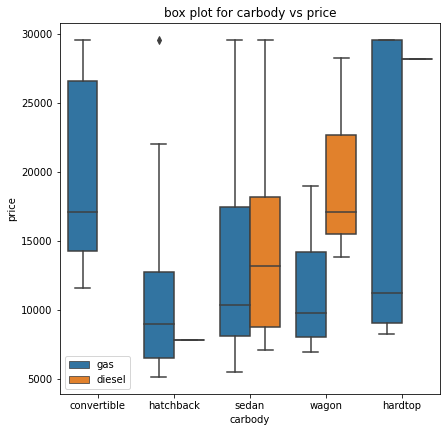

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.boxplot(x ='carbody', y ='price', data = df,hue='fueltype')
plt.title('box plot for carbody vs price')
plt.xlabel('carbody')
plt.ylabel('price')
plt.legend(loc='bottom right')
plt.show()

## findings:
1) carbody types like convertible, hatchback, hardtop only come with only one fuel type i.e., GAS

2) carbody types like sedan, wagon have both gas and diesel fuel type. And out of the two fuel types, the diesel fueltype has higher price compared to gas.

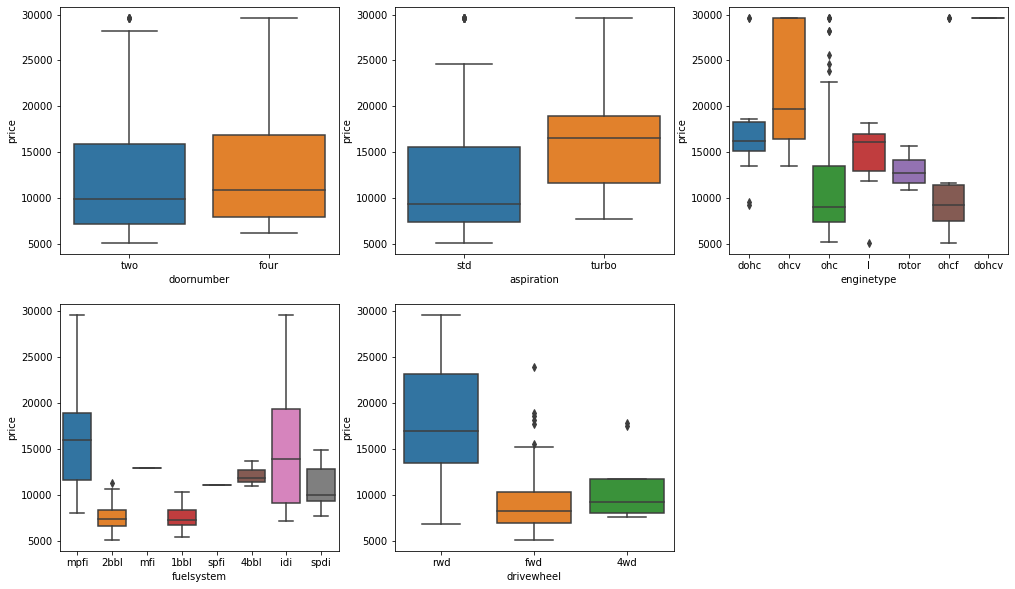

In [ ]:

plt.figure(figsize=(17, 10))
plt.subplot(2,3,1)
sns.boxplot(x=df['doornumber'],y=df['price'])
plt.subplot(2,3,2)
sns.boxplot(x=df['aspiration'],y=df['price'])
plt.subplot(2,3,3)
sns.boxplot(x=df['enginetype'],y=df['price'])
plt.subplot(2,3,4)
sns.boxplot(x=df['fuelsystem'],y=df['price'])
plt.subplot(2,3,5)
sns.boxplot(x=df['drivewheel'],y=df['price'])
plt.show()

**Change Categorical into Dummies Variable**

In [ ]:
categorical_cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [ ]:
# Get dummy variiable for categorical variable
df = pd.get_dummies(df,columns= categorical_cols, drop_first= True)

**3. Data Mining Method**

In [ ]:
# data tranformation wheelbase compretion ratio
df_MLR=df


In [ ]:
df_MLR['enginesize']=np.log(df_MLR['enginesize'])
df_MLR['wheelbase']=np.log(df_MLR['wheelbase'])
df_MLR.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,4.484132,48.8,4.867534,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,4.484132,48.8,4.867534,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,4.548600,52.4,5.023881,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,4.603168,54.3,4.691348,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,4.599152,54.3,4.912655,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn


Normalization Dataset

In [ ]:
y=df_MLR.iloc[:,9]
data_MLR = df_MLR
data_MLR['price'] = y
data_MLR.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,4.484132,48.8,4.867534,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,4.484132,48.8,4.867534,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,4.548600,52.4,5.023881,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,4.603168,54.3,4.691348,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,4.599152,54.3,4.912655,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
##Normalize dataset
#standardize the data by using standardscaler 
X=data_MLR.loc[:,df.columns!='price']
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(data_MLR[X.columns.tolist()])
car_data=pd.concat([pd.DataFrame(sc.transform(data_MLR[X.columns.tolist()]),
                            columns=X.columns.tolist()),
               df_MLR[['price']]], axis=1)
car_data.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,1.743470,-1.830776,-2.020417,0.298432,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13495.0
1,1.743470,-1.830776,-2.020417,0.298432,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
2,0.133509,-0.721000,-0.543527,0.905460,-2.404880,0.753841,-0.049433,-0.262757,-0.958163,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
3,0.938490,0.218361,0.235942,-0.385628,-0.517266,0.500383,1.214121,0.791357,-0.186058,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13950.0
4,0.938490,0.149227,0.235942,0.473616,-0.517266,0.500383,-1.312986,0.791357,-1.112584,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,17450.0


**Data Partition**

In [ ]:
# Partition data 
from sklearn.model_selection import train_test_split
X=car_data.loc[:,car_data.columns!='price']
y=car_data['price']
#Partition Data into training an validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Number of X training set: ",X_train.shape)
print(f"Number of Y training set: ",y_train.shape)
print(f"Number of Validation set: ",X_valid.shape)
print(f"Number of Validation set: ",y_valid.shape)

Number of X training set:  (153, 38)
Number of Y training set:  (153,)
Number of Validation set:  (52, 38)
Number of Validation set:  (52,)


**Multiple Linear Regression**

In [ ]:
# instal this so it will not produce error when perfirm the regression summary
!pip install dmba

     |████████████████████████████████| 11.8 MB 5.6 MB/s 


**Principal Compnent Analysis**

In [ ]:
from sklearn.decomposition import PCA
PC_MLR=PCA(n_components=3)
PC_MLR.fit(X_train)
X_train = PC_MLR.transform(X_train)
X_valid = PC_MLR.transform(X_valid)

#calculate percentage of variation explained
np.cumsum(np.round(PC_MLR.explained_variance_ratio_, decimals=4)*100)

array([ 43.71,  79.02, 100.  ])

In [ ]:
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [ ]:

ML= LinearRegression()
ML.fit(X_train,y_train)
# print coefficients
print(pd.DataFrame({'coefficient': ML.coef_}))
# Y intercept 
print('Y intercept : ',ML.intercept_)

   coefficient
0  2310.969358
1     6.568061
2  -223.183741
Y intercept :  12929.454248366013


**Prediction in Validation set**

In [ ]:
y_pred = ML.predict(X_valid)
regressionSummary(y_valid,ML.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 183.2373
       Root Mean Squared Error (RMSE) : 3713.2520
            Mean Absolute Error (MAE) : 2729.7829
          Mean Percentage Error (MPE) : -3.0383
Mean Absolute Percentage Error (MAPE) : 20.7966


In [ ]:
# make a function for R_square
def R_square(y_true,y_hat):
  y_bar=np.mean(y_true)
  ss_total=np.sum((y_true-y_bar)**2)
  ss_explained=np.sum((y_hat-y_bar)**2)
  ss_residual=np.sum((y_true-y_hat)**2)
  print(f'R-squared  = {1 - (ss_residual / ss_total)}\n')
# R asjective square for MLR
R_square_MLR=R_square(y_valid,y_pred)
R_adj_square_MLR=1-(1 - ML.score(X_valid,y_valid)) * (len(y_valid) - 1) / (len(y_valid) - X_valid.shape[1] - 1)
print('Adj_Rsquare: ' ,R_adj_square_MLR)

R-squared  = 0.7052756172545656

Adj_Rsquare:  0.6868553433329758


In [ ]:
from sklearn.metrics import r2_score
R2_MLR=r2_score(y_valid,y_pred)
R_adj_square_MLR=1-(1 - R2_MLR) * (len(y_valid) - 1) / (len(y_valid) - X_valid.shape[1] - 1)

print('Adj_Rsquare: ' ,R_adj_square_MLR)
print('R Square :' , R2_MLR)

Adj_Rsquare:  0.6868553433329758
R Square : 0.7052756172545656


Performance Evaluation for Multiple Linear Regression

In [ ]:
from sklearn import metrics
y_pred=ML.predict(X_valid)
residual1=y_valid-y_pred
result_model1= pd.DataFrame({'Predicted': y_pred, 'Actual': y_valid,
                             'Residual': residual1})
result_model1.head()


,Predicted,Actual,Residual
15,21883.019842,29575.500,7692.480158
9,15625.120677,17859.167,2234.046323
100,8893.400899,9549.000,655.599101
132,12016.504268,11850.000,-166.504268
68,18803.602081,28248.000,9444.397919


Text(0, 0.5, 'Predicted Car Price')

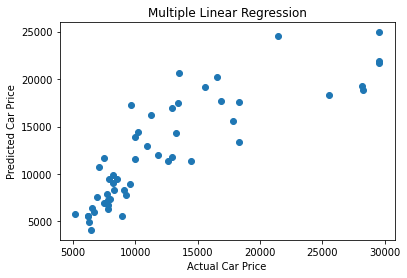

In [ ]:
%matplotlib inline
plt.scatter(x=result_model1['Actual'],y=result_model1['Predicted'])
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')

(array([ 2.,  0.,  3.,  7.,  1.,  7.,  6., 14.,  3.,  2.,  1.,  1.,  0.,
         3.,  2.]),
 array([-7580.7238599 , -6445.71574133, -5310.70762276, -4175.6995042 ,
        -3040.69138563, -1905.68326706,  -770.67514849,   364.33297008,
         1499.34108865,  2634.34920721,  3769.35732578,  4904.36544435,
         6039.37356292,  7174.38168149,  8309.38980005,  9444.39791862]),
 <a list of 15 Patch objects>)

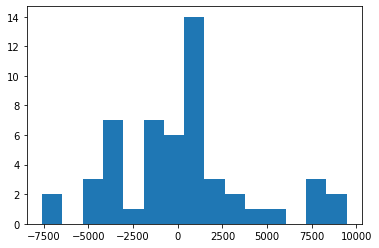

In [ ]:
plt.hist(residual1,bins=15)

**Lasso regression**

In [ ]:
#standardize the data by using standardscaler 
X=data_MLR.loc[:,data_MLR.columns!='price']
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(data_MLR[X.columns.tolist()])
car_data=pd.concat([pd.DataFrame(sc.transform(data_MLR[X.columns.tolist()]),
                            columns=X.columns.tolist()),
               df_MLR[['price']]], axis=1)
car_data.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,1.743470,-1.830776,-2.020417,0.298432,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13495.0
1,1.743470,-1.830776,-2.020417,0.298432,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
2,0.133509,-0.721000,-0.543527,0.905460,-2.404880,0.753841,-0.049433,-0.262757,-0.958163,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
3,0.938490,0.218361,0.235942,-0.385628,-0.517266,0.500383,1.214121,0.791357,-0.186058,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13950.0
4,0.938490,0.149227,0.235942,0.473616,-0.517266,0.500383,-1.312986,0.791357,-1.112584,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,17450.0


In [ ]:
# Partition data 
from sklearn.model_selection import train_test_split
X=car_data.loc[:,car_data.columns!='price']
y=car_data['price']
#Partition Data into training an validation set
X_t, X_v, y_t, y_v = train_test_split(X, y, test_size=0.25, random_state=1)
print(f"Number of X training set: ",X_t.shape)
print(f"Number of Y training set: ",y_t.shape)
print(f"Number of Validation set: ",X_v.shape)
print(f"Number of Validation set: ",y_v.shape)

Number of X training set:  (153, 38)
Number of Y training set:  (153,)
Number of Validation set:  (52, 38)
Number of Validation set:  (52,)


In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(random_state=0, max_iter=1000)
# Fit model
lasso.fit(X_t, y_t)


LassoCV(random_state=0)

In [ ]:
lasso.alpha_

21.958764164248

In [ ]:
#using best value to find the model
from sklearn.linear_model import Lasso
lasso_best=Lasso(alpha=lasso.alpha_)
lasso_best.fit(X_t, y_t)
A=pd.DataFrame({'Predictor': X.columns, 'coefficient': lasso_best.coef_})
print(A)

                Predictor  coefficient
0               symboling   733.814782
1               wheelbase  1385.489249
2               carheight    -0.000000
3              enginesize  2513.979638
4               boreratio    -0.000000
5                  stroke  -895.524629
6        compressionratio  -338.340135
7                 peakrpm   177.105790
8                 citympg  -381.866661
9            fueltype_gas  -377.594131
10       aspiration_turbo   690.207889
11         doornumber_two  -438.555823
12        carbody_hardtop  -619.660677
13      carbody_hatchback  -305.777730
14          carbody_sedan    -0.000000
15          carbody_wagon  -278.659709
16         drivewheel_fwd  -337.900551
17         drivewheel_rwd   813.731009
18    enginelocation_rear  1387.501854
19       enginetype_dohcv   160.620811
20           enginetype_l  -354.082950
21         enginetype_ohc   917.452394
22        enginetype_ohcf  -111.856147
23        enginetype_ohcv  -213.864573
24       enginetype_rotor

In [ ]:
A[A['coefficient']==0]

,Predictor,coefficient
2,carheight,-0.0
4,boreratio,-0.0
14,carbody_sedan,-0.0
24,enginetype_rotor,-0.0
28,cylindernumber_three,-0.0
30,cylindernumber_two,-0.0
33,fuelsystem_idi,0.0
34,fuelsystem_mfi,-0.0
35,fuelsystem_mpfi,-0.0


**Performance Evaluation for Lasso Regression**

In [ ]:
y_pred2=lasso_best.predict(X_v)
residual2=y_v-y_pred2
result_model2= pd.DataFrame({'Predicted': y_pred2, 'Actual': y_v,
                             'Residual': residual2})
result_model2.head()
regressionSummary(y_v,y_pred2)


Regression statistics

                      Mean Error (ME) : 369.5967
       Root Mean Squared Error (RMSE) : 2410.9278
            Mean Absolute Error (MAE) : 1773.1270
          Mean Percentage Error (MPE) : 0.2891
Mean Absolute Percentage Error (MAPE) : 14.8460


In [ ]:
# make a function for R_square
def R_square(y_true,y_hat):
  y_bar=np.mean(y_true)
  ss_total=np.sum((y_true-y_bar)**2)
  ss_explained=np.sum((y_hat-y_bar)**2)
  ss_residual=np.sum((y_true-y_hat)**2)
  print(f'R-squared  = {1 - (ss_residual / ss_total)}\n')
# R asjective square for MLR
R_square_Lasso=R_square(y_v,y_pred2)
R_adj_square_Lasso=1-(1 - lasso_best.score(X_v,y_v)) * (len(y_v) - 1) / (len(y_v) - X_v.shape[1] - 1)
print('Adj_Rsquare: ' ,R_adj_square_Lasso)

R-squared  = 0.8709059804026158

Adj_Rsquare:  0.49355423081026195


Text(0, 0.5, 'Predicted Car Price')

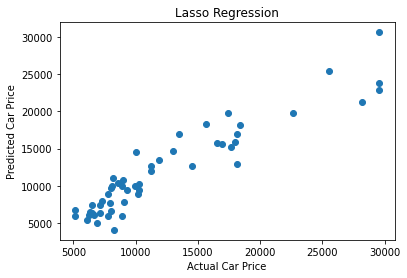

In [ ]:
plt.scatter(x=result_model2['Actual'],y=result_model2['Predicted'])
plt.title('Lasso Regression')
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')

(array([ 1.,  1.,  2.,  7.,  8.,  5., 10.,  6.,  4.,  3.,  0.,  1.,  1.,
         1.,  2.]),
 array([-4590.02848462, -3822.71055469, -3055.39262477, -2288.07469484,
        -1520.75676491,  -753.43883498,    13.87909495,   781.19702488,
         1548.5149548 ,  2315.83288473,  3083.15081466,  3850.46874459,
         4617.78667452,  5385.10460444,  6152.42253437,  6919.7404643 ]),
 <a list of 15 Patch objects>)

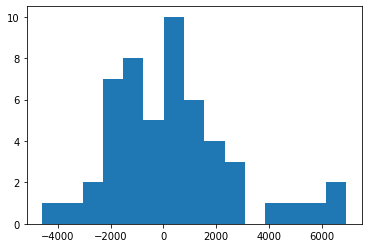

In [ ]:
plt.hist(residual2,bins=15)

**KNN MODEL**

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,4.484132,48.8,4.867534,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,4.484132,48.8,4.867534,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,4.548600,52.4,5.023881,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,4.603168,54.3,4.691348,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,4.599152,54.3,4.912655,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Find the anti log of df function
df_KNN=df
df_KNN['enginesize']=np.exp(df_KNN['enginesize'])
df_KNN['wheelbase']=np.exp(df_KNN['wheelbase'])
df_KNN.head()



,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,94.5,52.4,152.0,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,99.8,54.3,109.0,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,99.4,54.3,136.0,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y=df_KNN.iloc[:,9]
data1 = df_KNN
data1['price'] = y
data1.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,94.5,52.4,152.0,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,99.8,54.3,109.0,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,99.4,54.3,136.0,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
##Normalize dataset
#standardize the data by using standardscaler 
X=data1.loc[:,data1.columns!='price']
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(data1[X.columns.tolist()])
car_data1=pd.concat([pd.DataFrame(sc.transform(data1[X.columns.tolist()]),
                            columns=X.columns.tolist()),
               data1[['price']]], axis=1)
car_data1.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,1.743470,-1.723005,-2.020417,0.160196,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13495.0
1,1.743470,-1.723005,-2.020417,0.160196,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
2,0.133509,-0.717590,-0.543527,0.809329,-2.404880,0.753841,-0.049433,-0.262757,-0.958163,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,16500.0
3,0.938490,0.185580,0.235942,-0.459430,-0.517266,0.500383,1.214121,0.791357,-0.186058,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,13950.0
4,0.938490,0.117416,0.235942,0.337232,-0.517266,0.500383,-1.312986,0.791357,-1.112584,0.328798,...,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,17450.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn import neighbors

In [ ]:
X_data=car_data1.loc[:,car_data1.columns!='price']
y_data=car_data1['price']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.25, random_state = 1)
print(f"Number of X training set: ",train_X.shape)
print(f"Number of Y training set: ",train_y.shape)
print(f"Number of Validation set: ",test_X.shape)
print(f"Number of Validation set: ",test_y.shape)

Number of X training set:  (153, 38)
Number of Y training set:  (153,)
Number of Validation set:  (52, 38)
Number of Validation set:  (52,)


**Principal Component Analysis**

In [ ]:

PC_KNN=PCA(n_components=15)
PC_KNN.fit(train_X)
train_X=PC_KNN.transform(train_X)
test_X = PC_KNN.transform(test_X)

In [ ]:
np.cumsum(np.round(PC_KNN.explained_variance_ratio_, decimals=4)*100)

array([16.64, 30.5 , 39.79, 47.05, 53.47, 58.94, 63.82, 67.88, 71.79,
       75.56, 78.88, 81.98, 84.5 , 86.95, 88.93])

In [ ]:
# PCA analysis best on 15 components
components = pd.DataFrame(PC_KNN.components_, columns = X_data.columns, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
components

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,-0.009987,0.218274,0.055725,0.335110,0.252241,-0.024378,-0.022457,-0.013691,-0.314995,-0.027379,...,1.537473e-30,0.081404,0.039471,-0.269428,0.045464,0.027379,2.837310e-34,0.269322,-0.042726,-0.002312
2,0.312894,-0.268974,-0.320765,-0.056283,-0.048241,-0.066396,-0.114580,0.248089,-0.081414,0.248587,...,3.181393e-30,0.021322,0.248218,0.018271,0.285907,-0.248587,1.092245e-35,0.023447,0.065559,0.037200
3,-0.032214,0.131591,0.047082,-0.141174,-0.017686,0.127490,0.197220,-0.051011,0.034266,-0.266792,...,1.352698e-25,-0.037128,0.409665,-0.086028,0.471868,0.266792,6.081075e-34,-0.179043,-0.030997,0.001314
4,0.065535,0.100867,-0.089611,0.124570,-0.101527,0.423380,-0.245070,0.041204,-0.134918,0.008365,...,2.317225e-23,-0.019317,-0.074123,-0.226301,-0.085377,-0.008365,-6.580140e-34,0.092510,0.320336,0.038843
5,0.229556,-0.141636,-0.196725,0.100477,0.075673,0.096014,0.250258,-0.191373,0.158964,-0.342607,...,-9.365337e-23,-0.004516,-0.140465,-0.053977,-0.161793,0.342607,2.620350e-34,-0.186603,0.124168,0.124250
6,-0.021161,-0.087782,-0.165323,0.092950,-0.226633,0.076048,0.330645,0.047294,0.122590,-0.126797,...,-1.616642e-20,0.301017,0.010089,0.024111,0.011621,0.126797,-2.252924e-34,-0.002787,-0.227622,-0.095471
7,-0.064941,0.049988,-0.105024,0.012290,0.037326,-0.172855,0.078769,-0.174142,0.038481,0.059169,...,2.395370e-20,0.438635,-0.063487,0.095586,-0.073126,-0.059169,-3.655984e-34,-0.012847,-0.120659,0.209823
8,-0.008299,-0.030550,-0.155139,0.005338,0.080415,-0.070237,-0.192138,-0.123852,-0.088275,-0.019276,...,-1.517036e-18,0.422553,0.042827,0.032021,0.049330,0.019276,-1.499891e-33,-0.143485,0.405806,-0.327757
9,-0.011554,0.003224,-0.142677,-0.033391,0.297952,-0.056722,0.008549,0.150596,-0.051458,0.035641,...,-6.166400e-19,0.049572,0.015241,-0.132521,0.017555,-0.035641,-9.915566e-34,0.093483,0.139671,0.121708
10,-0.034149,-0.014121,-0.018166,0.055018,0.030613,-0.023069,0.050493,0.079461,-0.012980,-0.043303,...,9.147956e-19,0.036676,-0.011552,0.048335,-0.013306,0.043303,3.787812e-34,-0.007423,0.046204,-0.613398


In [ ]:
#The importance of the predictors
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features) 

get_important_features(train_X, PC_KNN.components_, X_data.columns.values)

Features by importance:
 [(2.9414557239871226, 'carheight'), (2.8528829759794716, 'symboling'), (2.7657325695719557, 'doornumber_two'), (2.75270421888086, 'wheelbase'), (2.619295234291312, 'fuelsystem_4bbl'), (2.2740119388929343, 'enginetype_rotor'), (2.2740119388929343, 'cylindernumber_two'), (2.271522264745977, 'fuelsystem_idi'), (2.2715222647459767, 'fueltype_gas'), (2.2629110204243297, 'peakrpm'), (2.231759183849423, 'carbody_hatchback'), (1.9881987894225737, 'enginesize'), (1.952138692194118, 'citympg'), (1.8913066687931954, 'cylindernumber_four'), (1.8703232791229183, 'drivewheel_rwd'), (1.8109458236648273, 'drivewheel_fwd'), (1.7118971277593389, 'carbody_sedan'), (1.6311013996531467, 'enginetype_ohc'), (1.5584855502440134, 'fuelsystem_mpfi'), (1.5564295804696797, 'enginetype_l'), (1.5533202488254578, 'fuelsystem_2bbl'), (1.511247626154951, 'boreratio'), (1.4960056320377626, 'cylindernumber_six'), (1.4445589147439186, 'enginelocation_rear'), (1.355981068792263, 'carbody_wagon'), 

In [ ]:
rmse_val = [] #to store rmse values for different k
coefs = []
for K in range(13):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X, train_y)  #fit the model
    coefs.append(model)
    pred=model.predict(test_X) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 2148.2318657534297
RMSE value for k=  2 is: 2427.0463627370204
RMSE value for k=  3 is: 2327.8449803779763
RMSE value for k=  4 is: 2695.217024953382
RMSE value for k=  5 is: 2639.3923894822537
RMSE value for k=  6 is: 2828.581646311894
RMSE value for k=  7 is: 3097.2905306777684
RMSE value for k=  8 is: 3208.7642904966256
RMSE value for k=  9 is: 3268.2645266090744
RMSE value for k=  10 is: 3416.595285416966
RMSE value for k=  11 is: 3535.4636000420774
RMSE value for k=  12 is: 3606.545344137993
RMSE value for k=  13 is: 3707.5466320619266


Text(0, 0.5, 'RMSE')

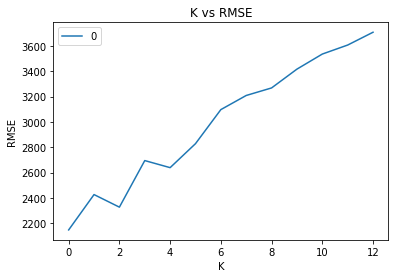

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.title('K vs RMSE')
plt.xlabel('K')
plt.ylabel('RMSE')

In [ ]:
best_K = rmse_val.index(min(rmse_val)) + 1
print("The best K value is:\t",best_K)

coef_ = neighbors.KNeighborsRegressor(n_neighbors=best_K)
coef_.fit(train_X, train_y)
pred_test= coef_.predict(test_X)
rmse_val.append(mean_squared_error(test_y, pred_test))
regressionSummary(test_y, pred_test)

The best K value is:	 1

Regression statistics

                      Mean Error (ME) : 416.7019
       Root Mean Squared Error (RMSE) : 2148.2319
            Mean Absolute Error (MAE) : 1555.2788
          Mean Percentage Error (MPE) : 1.8583
Mean Absolute Percentage Error (MAPE) : 13.8819


In [ ]:
# make a function for R_square
def R_square(y_true,y_hat):
  y_bar=np.mean(y_true)
  ss_total=np.sum((y_true-y_bar)**2)
  ss_explained=np.sum((y_hat-y_bar)**2)
  ss_residual=np.sum((y_true-y_hat)**2)
  print(f'R-squared  = {1 - (ss_residual / ss_total)}\n')
# R asjective square for MLR
R_square_KNN=R_square(test_y,pred_test)
R_adj_square_KNN=1-(1 - coef_.score(test_X,test_y)) * (len(test_y) - 1) / (len(test_y) - test_X.shape[1] - 1)
print('Adj_Rsquare: ' ,R_adj_square_KNN)

R-squared  = 0.8975056242812378

Adj_Rsquare:  0.8547996343984202


In [ ]:
from sklearn.metrics import r2_score
R2_KNN=r2_score(test_y,pred_test)
R_adj_square_KNN=1-(1 - R2_KNN) * (len(test_y) - 1) / (len(test_y) - test_X.shape[1] - 1)

print('Adj_Rsquare: ' ,R_adj_square_KNN)
print('R Square :' , R2_KNN)

Adj_Rsquare:  0.8547996343984202
R Square : 0.8975056242812378


**Regression Trees**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
df_RT=df
df_RT.head()


,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,94.5,52.4,152.0,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,99.8,54.3,109.0,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,99.4,54.3,136.0,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_data3=df_RT.iloc[:,df_RT.columns!='price']
y_data3=df_RT['price']
tr_X, te_X, tr_y, te_y = train_test_split(X_data3, y_data3, test_size=0.25, random_state = 1)
print(f"Number of X training set: ",tr_X.shape)
print(f"Number of Y training set: ",tr_y.shape)
print(f"Number of Validation set: ",te_X.shape)
print(f"Number of Validation set: ",te_y.shape)

Number of X training set:  (153, 38)
Number of Y training set:  (153,)
Number of Validation set:  (52, 38)
Number of Validation set:  (52,)


In [ ]:
model3 = DecisionTreeRegressor(random_state=1)
model3.fit(tr_X, tr_y)
print('Regression Tree Train Score is : ' , model3.score(tr_X, tr_y))
print('Regression Tree Test Score is : ' , model3.score(te_X, te_y))
print('----------------------------------------------------')
predictions = model3.predict(te_X)
print('Predicted Value for Regression Tree is : ' , predictions[:10])

Regression Tree Train Score is :  0.9948788090830551
Regression Tree Test Score is :  0.9230522812048809
----------------------------------------------------
Predicted Value for Regression Tree is :  [ 6189.          7349.          6377.          6295.
  8845.         29575.5         6482.33333333  6295.
  6918.          8495.        ]


In [ ]:
regressionSummary(te_y, predictions) 


Regression statistics

                      Mean Error (ME) : 105.4006
       Root Mean Squared Error (RMSE) : 1861.3541
            Mean Absolute Error (MAE) : 1297.2853
          Mean Percentage Error (MPE) : 0.1501
Mean Absolute Percentage Error (MAPE) : 11.2046


In [ ]:
# make a function for R_square
def R_square(y_true,y_hat):
  y_bar=np.mean(y_true)
  ss_total=np.sum((y_true-y_bar)**2)
  ss_explained=np.sum((y_hat-y_bar)**2)
  ss_residual=np.sum((y_true-y_hat)**2)
  print(f'R-squared  = {1 - (ss_residual / ss_total)}\n')
# R asjective square for MLR
R_square_RT=R_square(te_y, predictions)
R_adj_square_RT=1-(1 - model3.score(te_X, te_y)) * (len(te_y) - 1) / (len(te_y) - te_X.shape[1] - 1)
print('Adj_Rsquare: ' ,R_adj_square_RT)

R-squared  = 0.9230522812048809

Adj_Rsquare:  0.6981281801114559


In [ ]:
from sklearn.metrics import r2_score
R2_RT=r2_score(te_y, predictions)
R_adj_square_RT=1-(1 - R2_RT) * (len(te_y) - 1) / (len(te_y) - te_X.shape[1] - 1)

print('Adj_Rsquare: ' ,R_adj_square_RT)
print('R Square :' , R2_RT)

Adj_Rsquare:  0.6981281801114559
R Square : 0.9230522812048809


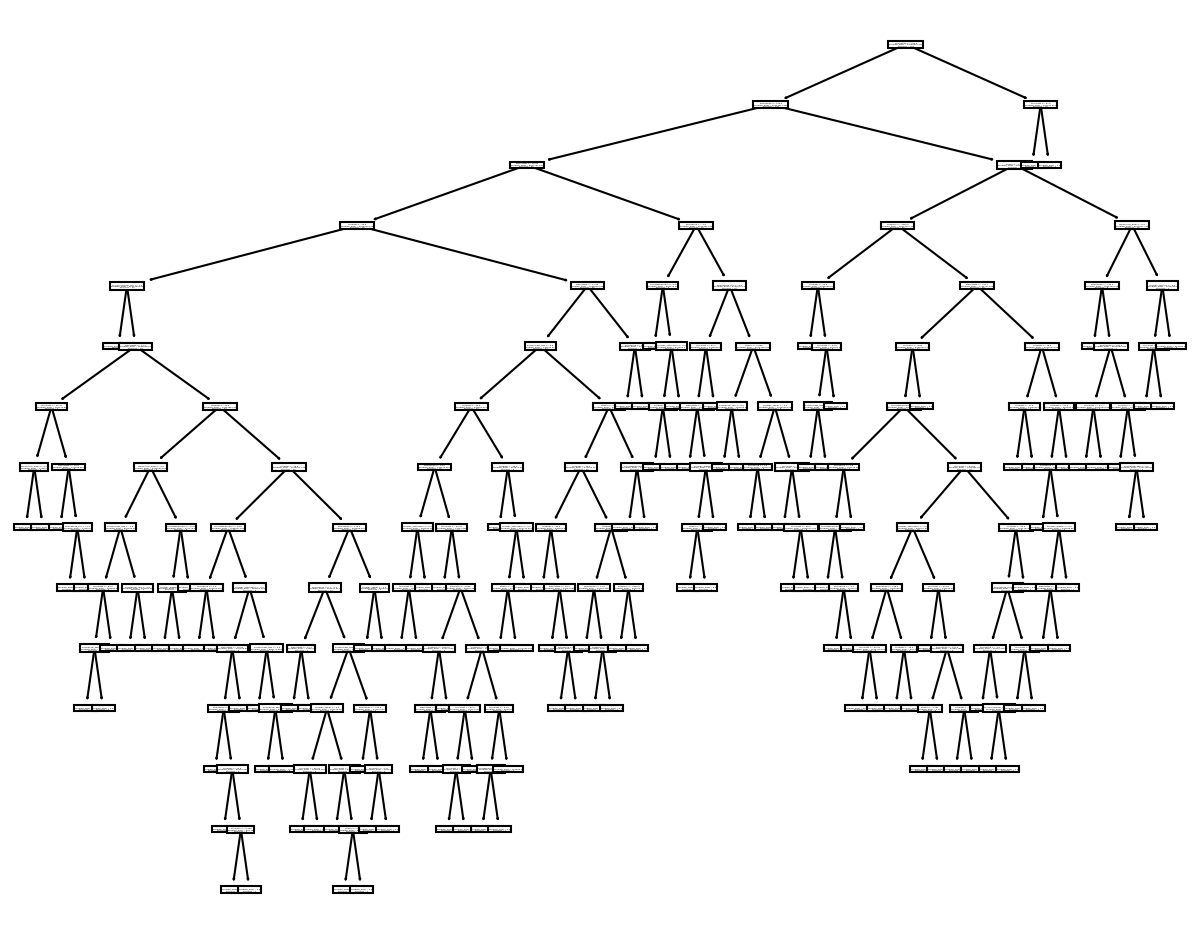

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model3, feature_names=X.columns)
plt.show()

**Prunning**

In [ ]:
#PRUNING

In [ ]:
# instal this so it will not produce error when perform the regression summary
!pip install dmba

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn import tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
depth2=[]
for i in range(1,20):
    dt_reg = DecisionTreeRegressor(random_state=0, criterion="mae", max_depth=i)
    model4 = dt_reg.fit(tr_X, tr_y)
    # Perform 5-fold cross validation 
    model4_scores = cross_val_score(model4, tr_X, tr_y,cv = 5, scoring='r2')
    pred_y = model4.predict(te_X)
    error = mean_squared_error(te_y,pred_y)
    depth2.append(error) #store rmse values
    print('Mean Square Error ' , i , 'is:', error)
    print("mean cross validation score: {}".format(np.mean(model4_scores)))
    

Mean Square Error  1 is: 21283560.826923076
mean cross validation score: 0.3534102641885939
Mean Square Error  2 is: 7205786.629807692
mean cross validation score: 0.79112224193069
Mean Square Error  3 is: 4408348.004807692
mean cross validation score: 0.817455173765962
Mean Square Error  4 is: 4368796.158653846
mean cross validation score: 0.806652872636749
Mean Square Error  5 is: 3870238.831730769
mean cross validation score: 0.8155945037048541
Mean Square Error  6 is: 3402221.4423076925
mean cross validation score: 0.826192144443716
Mean Square Error  7 is: 3617462.5865384615
mean cross validation score: 0.8300238418285311
Mean Square Error  8 is: 3822147.7756517115
mean cross validation score: 0.8223766242312932
Mean Square Error  9 is: 4194762.280459404
mean cross validation score: 0.826520792364444
Mean Square Error  10 is: 4539194.823728635
mean cross validation score: 0.8417683616127016
Mean Square Error  11 is: 4327210.057692308
mean cross validation score: 0.8383152235178597

In [ ]:
best_tree_depth = depth2.index(min(depth2)) + 1
print("The best tree depth value is:\t", best_tree_depth)

The best tree depth value is:	 6


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

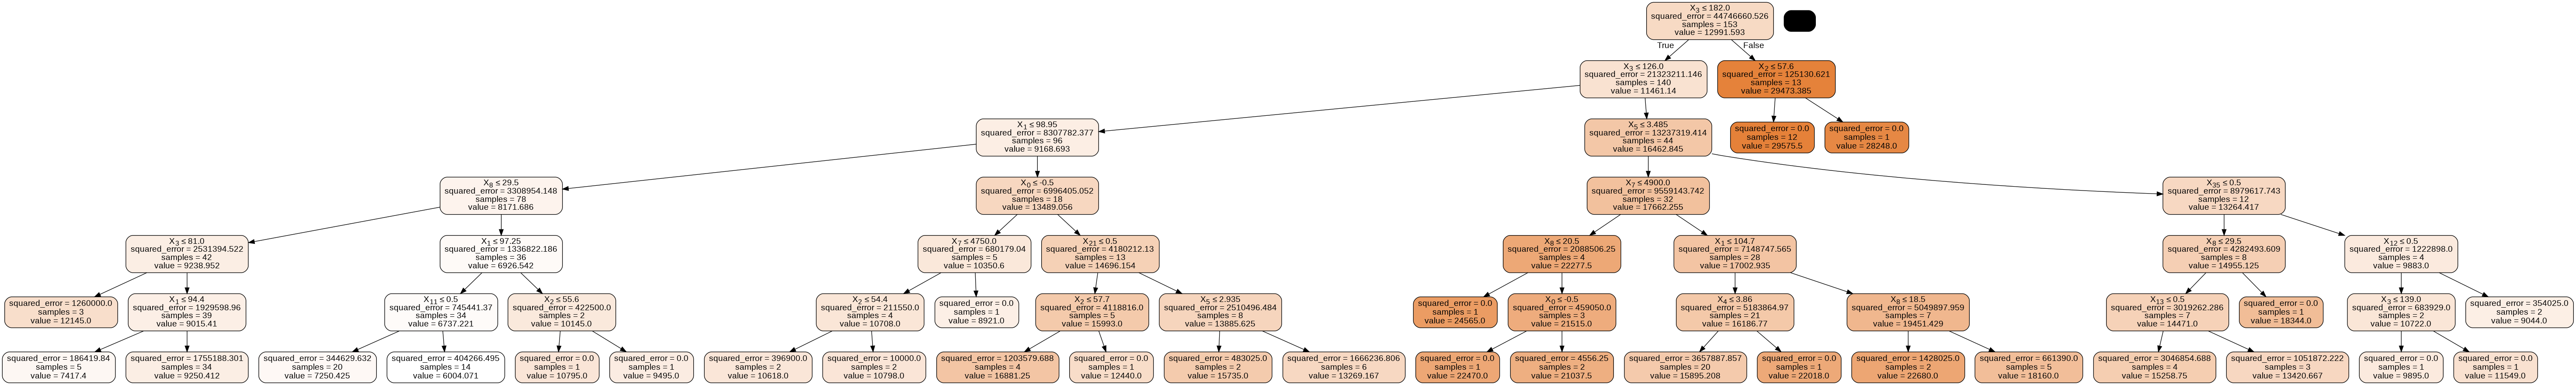

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0, max_depth=6)  
# fit the regressor with X_tra and y_ar data 
model_prun=regressor.fit(tr_X, tr_y)

dot_data = StringIO()
export_graphviz(model_prun, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('TAX.png')
Image(graph.create_png())

In [ ]:
print('Regression Tree Train Score is : ' , model_prun.score(tr_X, tr_y))
print('Regression Tree Test Score is : ' , model_prun.score(te_X, te_y))
print('----------------------------------------------------')
predictions_RTP = model_prun.predict(te_X)
print('Predicted Value for Regression Tree is : ' , predictions[:10])

Regression Tree Train Score is :  0.9724062557604676
Regression Tree Test Score is :  0.9095446295117949
----------------------------------------------------
Predicted Value for Regression Tree is :  [ 6189.          7349.          6377.          6295.
  8845.         29575.5         6482.33333333  6295.
  6918.          8495.        ]


In [ ]:
regressionSummary(te_y, predictions_RTP) 


Regression statistics

                      Mean Error (ME) : 308.2583
       Root Mean Squared Error (RMSE) : 2018.1262
            Mean Absolute Error (MAE) : 1498.3873
          Mean Percentage Error (MPE) : 2.1242
Mean Absolute Percentage Error (MAPE) : 13.0413


In [ ]:
# make a function for R_square
def R_square(y_true,y_hat):
  y_bar=np.mean(y_true)
  ss_total=np.sum((y_true-y_bar)**2)
  ss_explained=np.sum((y_hat-y_bar)**2)
  ss_residual=np.sum((y_true-y_hat)**2)
  print(f'R-squared  = {1 - (ss_residual / ss_total)}\n')
# R asjective square for MLR
R_square_RTP=R_square(te_y, predictions_RTP)
R_adj_square_RTP=1-(1 - model_prun.score(te_X, te_y)) * (len(te_y) - 1) / (len(te_y) - te_X.shape[1] - 1)
print('Adj_Rsquare: ' ,R_adj_square_RTP)

R-squared  = 0.9095446295117949

Adj_Rsquare:  0.6451366234693494


In [ ]:
from sklearn.metrics import r2_score
R2_RTP=r2_score(te_y, predictions_RTP)
R_adj_square_RTP=1-(1 - R2_RTP) * (len(te_y) - 1) / (len(te_y) - te_X.shape[1] - 1)
R_adj_square_RTP
print('Adj_Rsquare: ' ,R_adj_square_RTP)
print('R Square :' , R2_RTP)

Adj_Rsquare:  0.6451366234693494
R Square : 0.9095446295117949


**Random Forest**

In [ ]:
df_RF=df
df_RF.head()

,symboling,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,88.6,48.8,130.0,3.47,2.68,9.0,5000.0,21.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,94.5,52.4,152.0,2.68,3.47,9.0,5000.0,19.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,99.8,54.3,109.0,3.19,3.40,10.0,5500.0,24.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,99.4,54.3,136.0,3.19,3.40,8.0,5500.0,18.0,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_data4=df_RF.iloc[:,df_RT.columns!='price']
y_data4=df_RF['price']
X_tr, X_te, y_tr, y_te = train_test_split(X_data4, y_data4, test_size=0.25, random_state = 1)
print(f"Number of X training set: ",X_tr.shape)
print(f"Number of Y training set: ",y_tr.shape)
print(f"Number of Validation set: ",X_te.shape)
print(f"Number of Validation set: ",y_te.shape)

Number of X training set:  (153, 38)
Number of Y training set:  (153,)
Number of Validation set:  (52, 38)
Number of Validation set:  (52,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor_RF = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor_RF.fit(X_tr,y_tr)
print('Random Forest Regressor Train Score: ' , regressor_RF.score(X_tr,y_tr))
print('Random Forest Regressor Train Score: ', regressor_RF.score(X_te,y_te))
print('----------------------------------------------------')
pred_RF=regressor_RF.predict(X_te)
print('Predicted Value for Random Forest Regressor is : ' , pred_RF[:10])

Random Forest Regressor Train Score:  0.9858263440684951
Random Forest Regressor Train Score:  0.9291503965892948
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [ 6192.68        7269.21166667  6300.48190476  6488.66482143
  9022.58       28449.58        6600.53380952  6162.09
  6730.175       9186.2       ]


In [ ]:
regressionSummary(y_te, pred_RF) 


Regression statistics

                      Mean Error (ME) : 331.8795
       Root Mean Squared Error (RMSE) : 1786.0756
            Mean Absolute Error (MAE) : 1224.0318
          Mean Percentage Error (MPE) : 1.3395
Mean Absolute Percentage Error (MAPE) : 10.4049


In [ ]:
# make a function for R_square
def R_square(y_true,y_hat):
  y_bar=np.mean(y_true)
  ss_total=np.sum((y_true-y_bar)**2)
  ss_explained=np.sum((y_hat-y_bar)**2)
  ss_residual=np.sum((y_true-y_hat)**2)
  print(f'R-squared  = {1 - (ss_residual / ss_total)}\n')
# R asjective square for MLR
R_square_RF=R_square(y_te, pred_RF)
R_adj_square_RF=1-(1 - regressor_RF.score(X_te,y_te)) * (len(y_te) - 1) / (len(y_te) - X_te.shape[1] - 1)
print('Adj_Rsquare: ' ,R_adj_square_RF)

R-squared  = 0.9291503965892948

Adj_Rsquare:  0.7220515558503102


In [ ]:
from sklearn.metrics import r2_score
R2_RF=r2_score(y_te, pred_RF)
R_adj_square_RF=1-(1 - R2_RF) * (len(y_te) - 1) / (len(y_te) - X_te.shape[1] - 1)
R_adj_square_RF
print('Adj_Rsquare: ' ,R_adj_square_RF)
print('R Square :' , R2_RF)

Adj_Rsquare:  0.7220515558503102
R Square : 0.9291503965892948


**Model Comparison**

In [ ]:
# Make data frame for model comparison 
Model_comparison=pd.DataFrame({"Method":["Multiple Liner Regression"," Lasso Regression", "K-Nearest Neighbor", "Regression Tree",
                          "Prunning Regression Tree", "Random Forest"],"RMSE":[3713.2520,2410.9278,2148.2319,1861.3541,2018.1262,1786.0756],
                  "MAE":[2729.7829,1773.1270,1555.2788,1297.2853,1498.3873,1224.0318],
                  "R2":[0.7052756172545656,0.8709059804026158,0.8975056242812378,0.9230522812048809,0.9095446295117949,0.9291503965892948],
                  "Adjusted R2":[0.6868553433329758,0.49355423081026195,0.8547996343984202,0.6981281801114559,0.6451366234693494,0.7220515558503102]})
Model_comparison

,Method,RMSE,MAE,R2,Adjusted R2
0,Multiple Liner Regression,3713.2520,2729.7829,0.705276,0.686855
1,Lasso Regression,2410.9278,1773.1270,0.870906,0.493554
2,K-Nearest Neighbor,2148.2319,1555.2788,0.897506,0.854800
3,Regression Tree,1861.3541,1297.2853,0.923052,0.698128
4,Prunning Regression Tree,2018.1262,1498.3873,0.909545,0.645137
5,Random Forest,1786.0756,1224.0318,0.929150,0.722052


Text(0.5, 1.0, 'Comparison Method Based on RMSE')

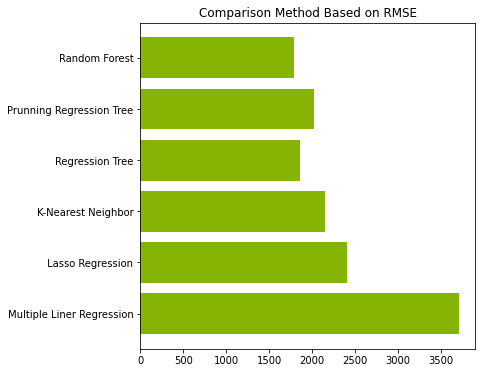

In [ ]:
Method=Model_comparison["Method"]
RMSE=Model_comparison["RMSE"]
Adj_R2=Model_comparison['Adjusted R2']
fig = plt.subplots(figsize =(6, 6))
plt.barh(Method,RMSE,color="#86B404")
plt.title("Comparison Method Based on RMSE")

Text(0.5, 1.0, 'Comparison Method Based on Adjusted R2')

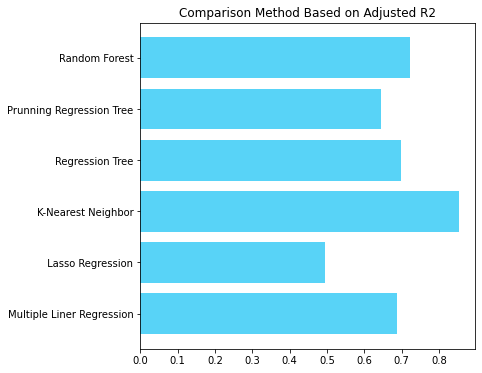

In [ ]:
fig = plt.subplots(figsize =(6, 6))
plt.barh(Method,Adj_R2,color="#58D3F7")
plt.title("Comparison Method Based on Adjusted R2")